In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
np.random.seed(1000)
nb_samples = 50


In [3]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.scatter(X, Y)

    plt.show()


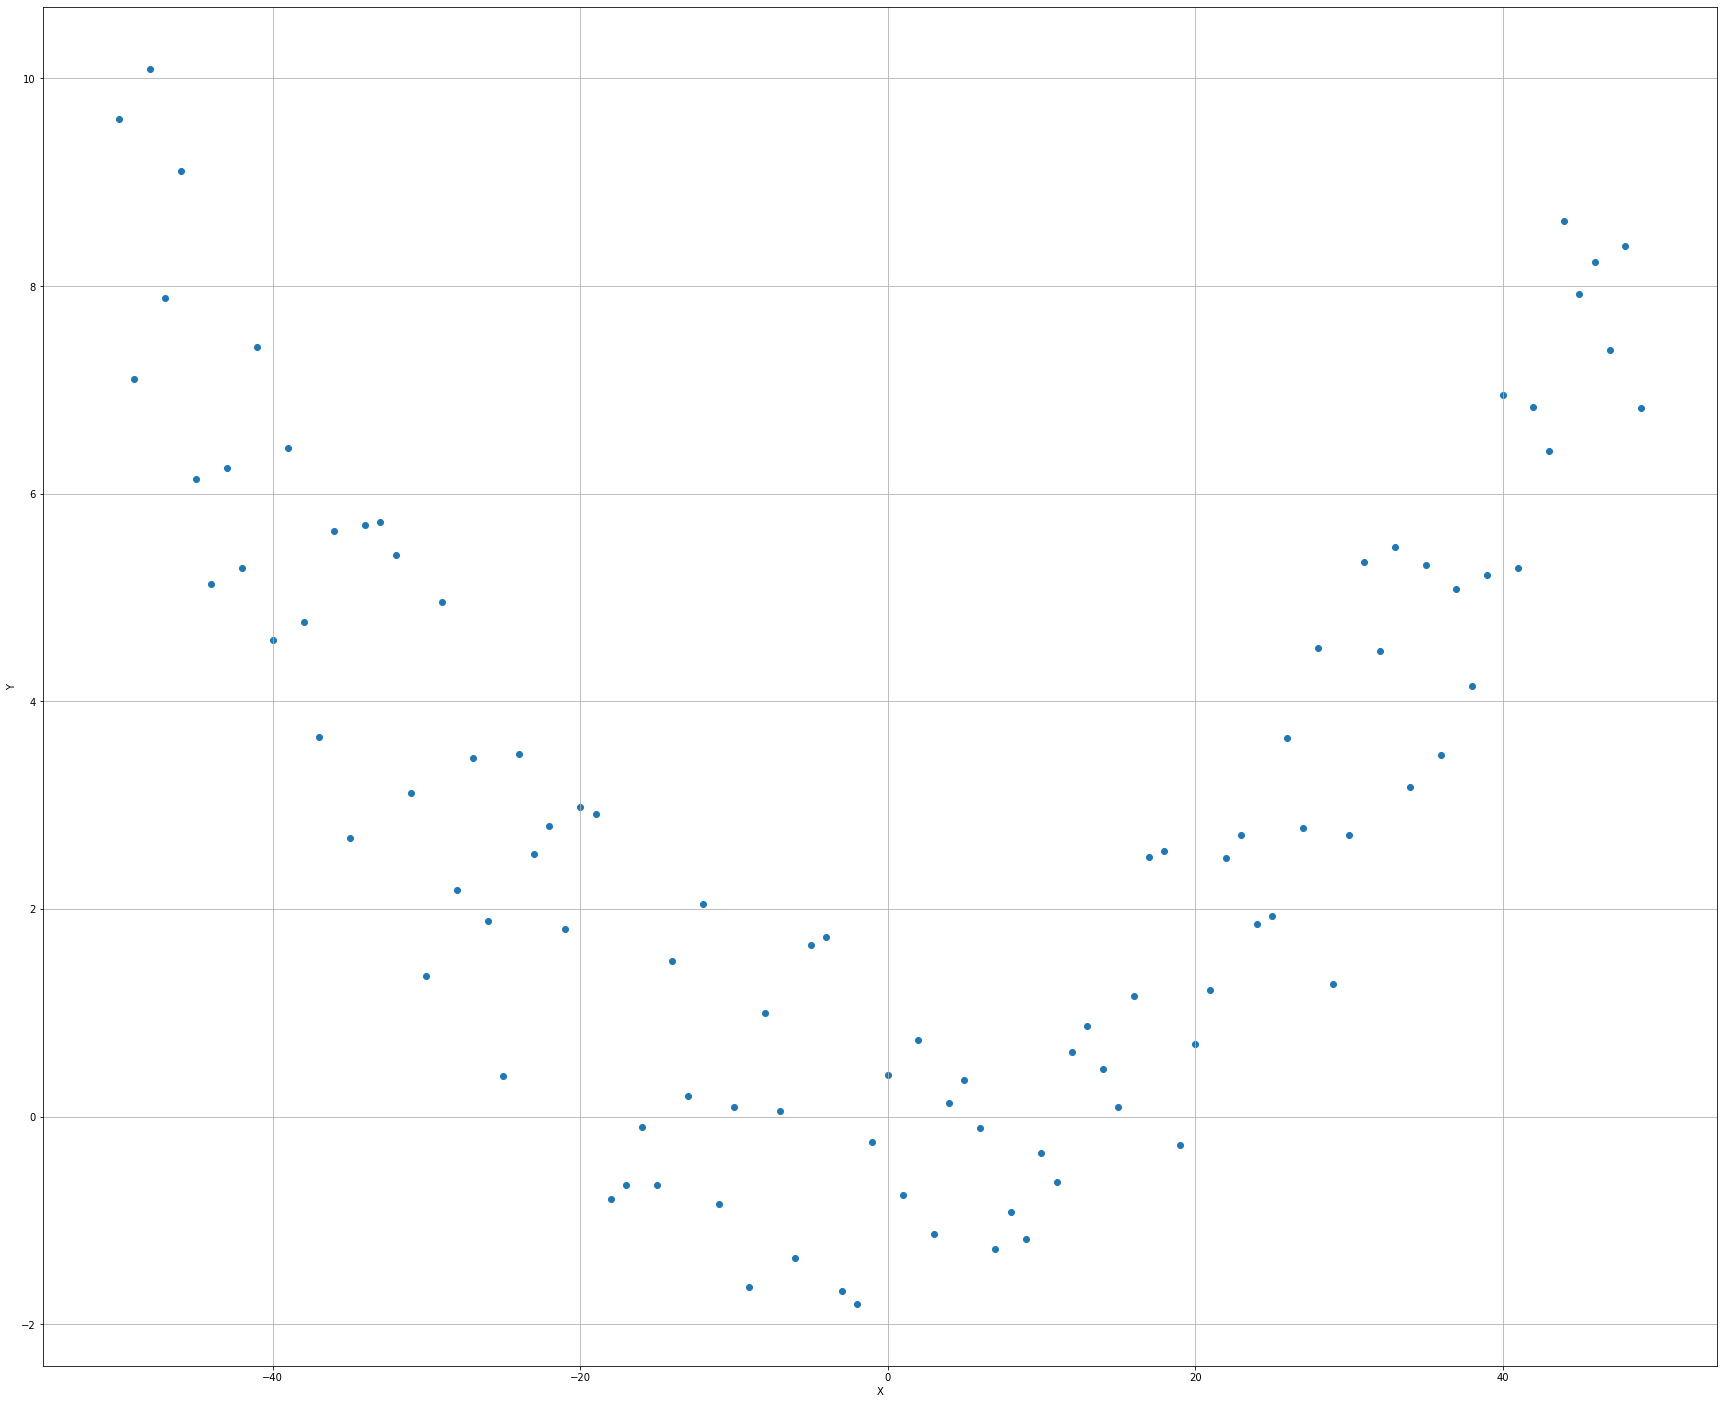

SVR CV average negative squared error: -1.366


In [4]:
from sklearn.svm import SVR
# Create dataset

X = np.arange(-nb_samples, nb_samples, 1)
Y = np.zeros(shape=(2 * nb_samples,))

for x in X:
    Y[int(x) + nb_samples] = np.power(x * 6, 2.0) / 1e4 + np.random.uniform(-2, 2)

# Show dataset
show_dataset(X, Y)

# Create and train a Support Vector regressor
svr = SVR(kernel='poly', degree=2, C=1.5, epsilon=0.5)
svr_scores = cross_val_score(svr, X.reshape((nb_samples*2, 1)), Y, scoring='neg_mean_squared_error', cv=10)
print('SVR CV average negative squared error: %.3f' % svr_scores.mean())

As it is shown above, the CV negative mean square error is lower than the standard deviation of the noise. To get confirmation, we can predict the regression value of all samples (the model muist be fitted because the cross_Val_score function creates internal instances):


In [5]:
svr.fit(X.reshape(-1,1), Y.ravel())
Y_pred = svr.predict(X.reshape(-1,1))

In [6]:
print(Y_pred)

[ 9.17649737  8.80412081  8.439267    8.08193596  7.73212767  7.38984215
  7.05507938  6.72783937  6.40812212  6.09592763  5.79125589  5.49410692
  5.2044807   4.92237725  4.64779655  4.38073861  4.12120343  3.86919101
  3.62470135  3.38773445  3.1582903   2.93636892  2.72197029  2.51509442
  2.31574131  2.12391096  1.93960337  1.76281854  1.59355647  1.43181715
  1.2776006   1.1309068   0.99173576  0.86008748  0.73596196  0.6193592
  0.51027919  0.40872195  0.31468747  0.22817574  0.14918677  0.07772056
  0.01377711 -0.04264358 -0.09154151 -0.13291669 -0.1667691  -0.19309876
 -0.21190565 -0.22318979 -0.22695117 -0.22318979 -0.21190565 -0.19309876
 -0.1667691  -0.13291669 -0.09154151 -0.04264358  0.01377711  0.07772056
  0.14918677  0.22817574  0.31468747  0.40872195  0.51027919  0.6193592
  0.73596196  0.86008748  0.99173576  1.1309068   1.2776006   1.43181715
  1.59355647  1.76281854  1.93960337  2.12391096  2.31574131  2.51509442
  2.72197029  2.93636892  3.1582903   3.38773445  3.6

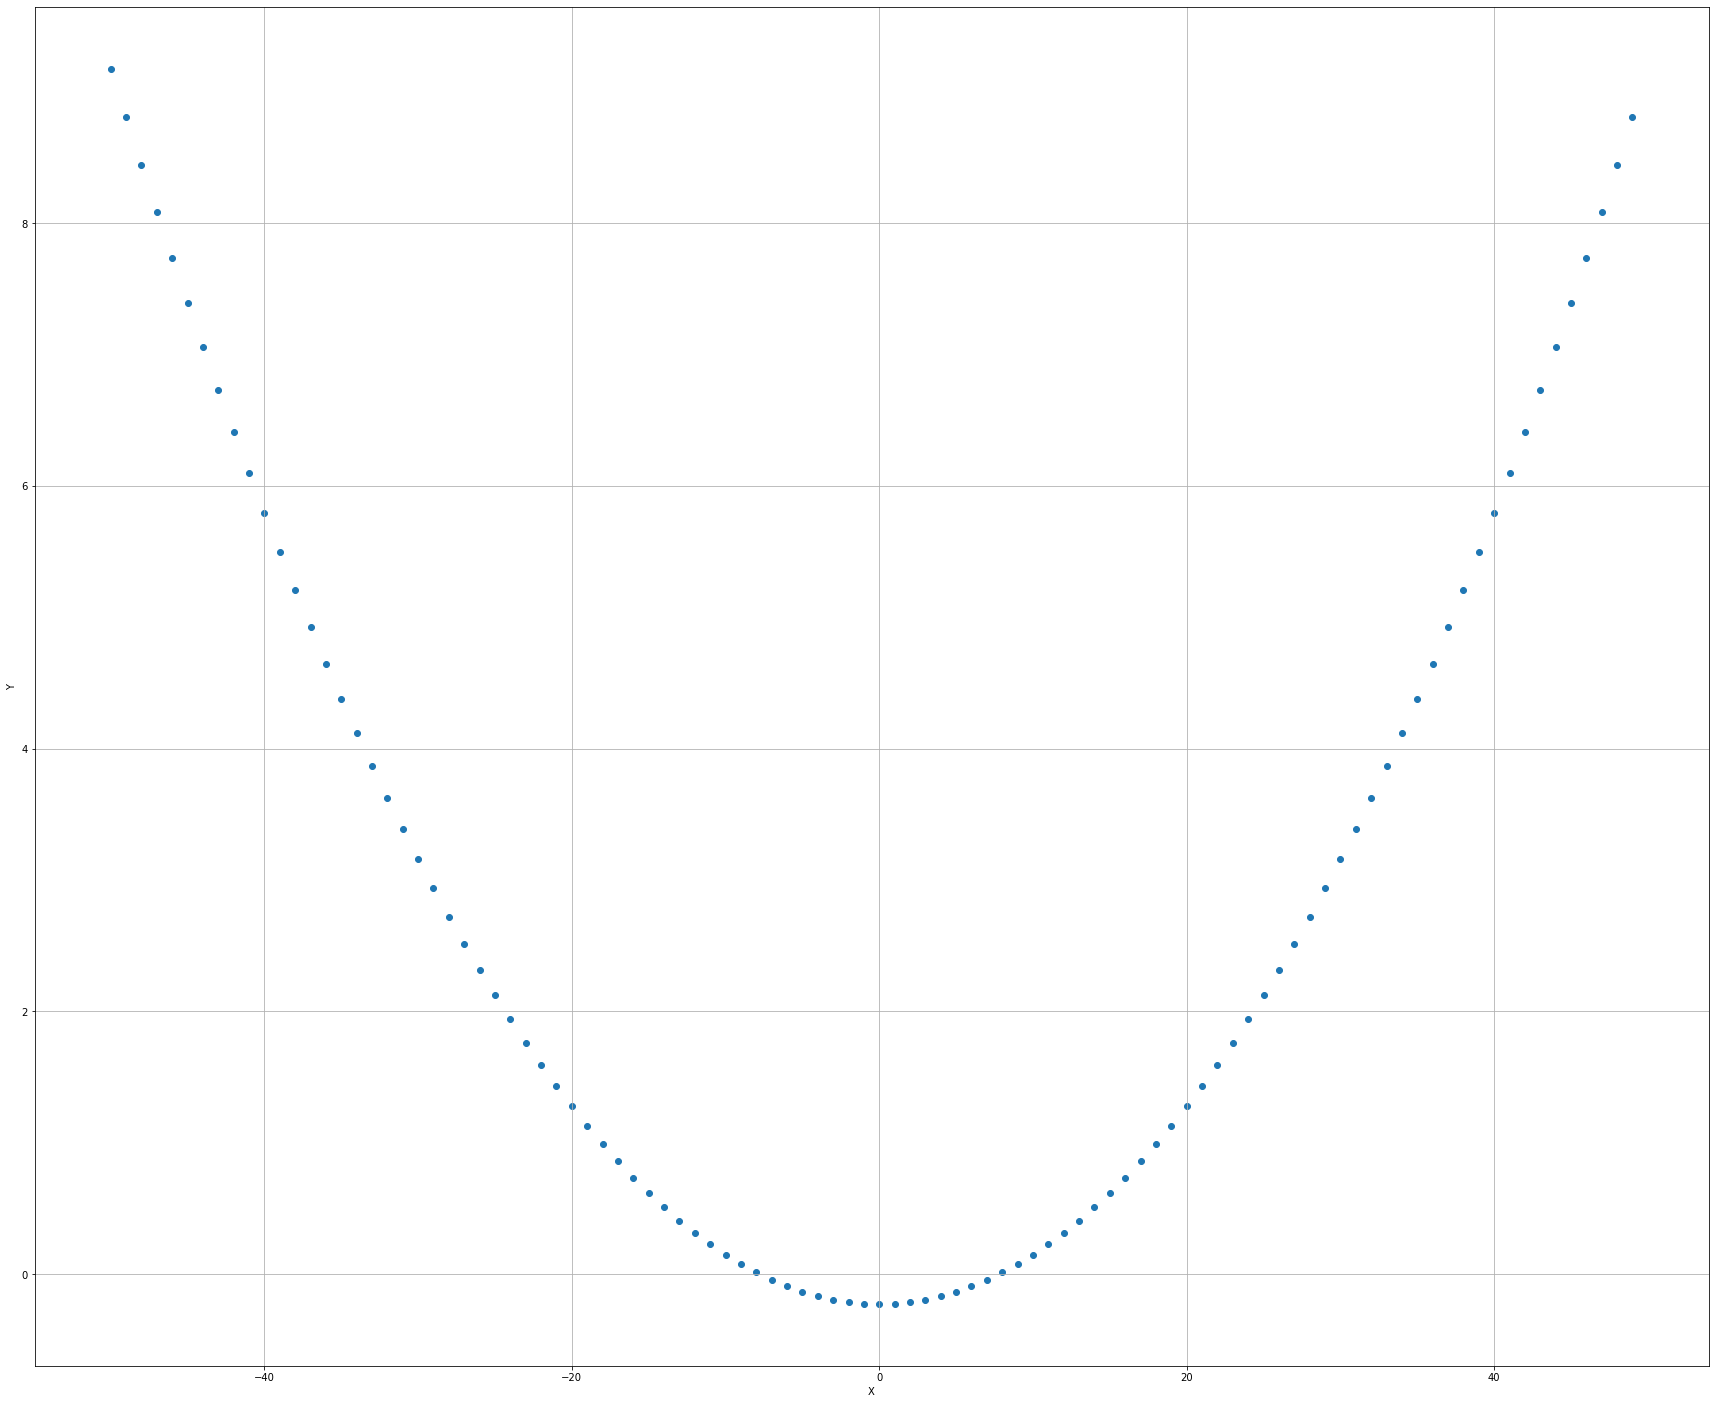

In [7]:
# Show dataset
show_dataset(X, Y_pred)